#Punto 1 Taller 8 (Quiz 6)

##Maria Camila Remolina Gutierrez

Escriba un programa que haga graficas de los lugares donde el campo electrico tiene valores constantes para una carga electrica $\frac{q}{4\pi \epsilon_0} = 1 \quad N m^2$ que se mueve a con $\beta$ arbitratio. $\beta$ es un valor que el usuario debe poder cambiar.

In [1]:
%pylab inline
from scipy.integrate import odeint

Populating the interactive namespace from numpy and matplotlib


Sabemos por la solucion del taller 7 que:

##$$\phi(\vec{r},t) = \frac{\gamma q}{4\pi \epsilon_0} \frac{1}{\sqrt{x^2+y^2+\gamma^2(z-\beta ct)^2}} = \frac{\gamma}{\sqrt{x^2+y^2+\gamma^2(z-\beta ct)^2}} $$

donde: $\gamma = \frac{1}{\sqrt{1-\beta^2}}$

Sacando el campo electrico tenemos:

##$$\vec{E}(\vec{r},t) = \gamma \frac{x\hat{i}+y\hat{j}+(z-\beta ct)\hat{k}}{(x^2+y^2+\gamma^2(z-\beta ct)^2)^\frac{3}{2}}$$

Como quiero la proyección en el plano xz, fijo la componente y=0. Además como solo me interesa conocer la magnitud de E para hacer los contornos, saco la magnitud.

##$$E = \gamma \frac{(x^2+(z-\beta ct)^2)^\frac{1}{2}}{(x^2+\gamma^2(z-\beta ct)^2)^\frac{3}{2}}$$

In [134]:
#Se pide el valor de beta al usuario:

beta = float(input("Ingrese el valor de beta (v/c): \n"))

Ingrese el valor de beta (v/c): 
0.98


In [135]:
#Constantes (Todas las unidades en este programa estan en SI):

c = 3.0*10**8

In [136]:
#Funcion gamma

def gamma(b):
    return 1/sqrt(1-b**2)

#Funcion E

def campoE(x,z,t,b):
    return gamma(b)*sqrt(x**2+(z-b*c*t)**2)/(x**2+(gamma(b)**2)*(z-b*c*t)**2)**1.5

In [137]:
#Inizializando:

num_xs = 2000
num_zs = 1000

xs = linspace(-1.0,1.0,num_xs)
zs = linspace(-0.5,0.5,num_zs)
t = 0

E = zeros((num_xs,num_zs))

In [138]:
for i in range(num_xs):
    for j in range(num_zs):
        E[i,j] = campoE(xs[i], zs[j], t, beta)

<matplotlib.colorbar.Colorbar instance at 0x7f10fe1e67e8>

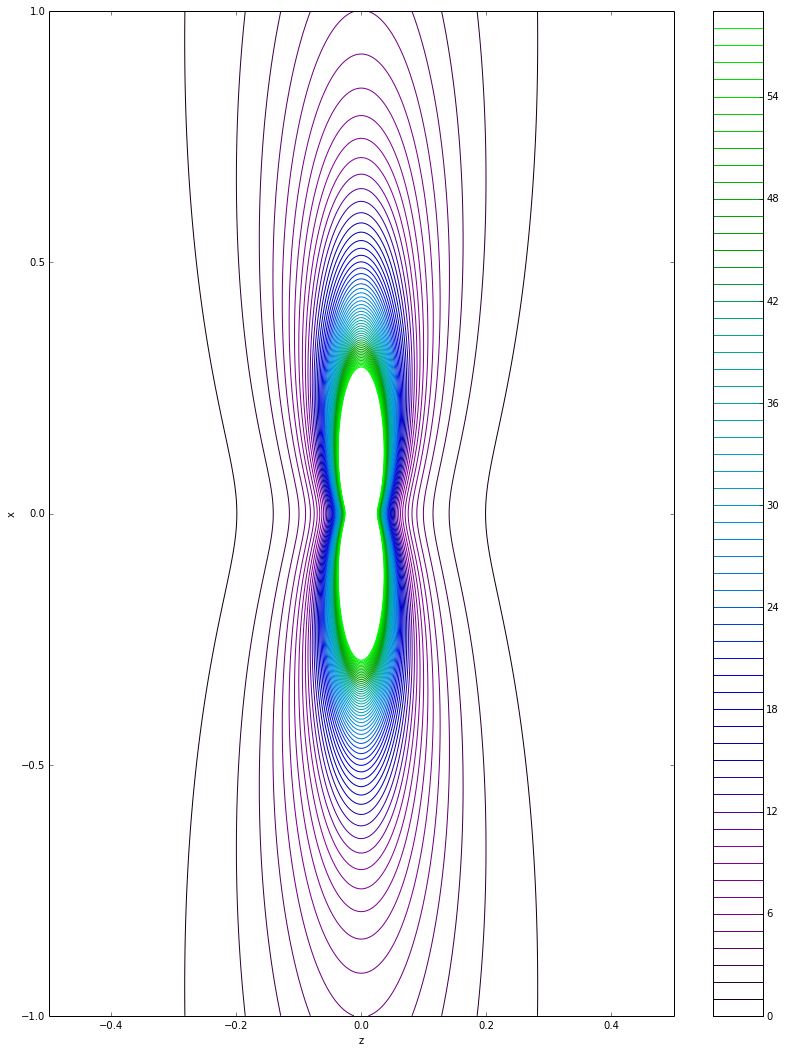

In [142]:
fig = figure(figsize=(14,18))

xlabel("z")
ylabel("x")

contour(E, extent=[-0.5,0.5,-1,1], levels=arange(60),  vmin=0, vmax=100, cmap = 'spectral', lw=2)
colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7f10fe6664d0>

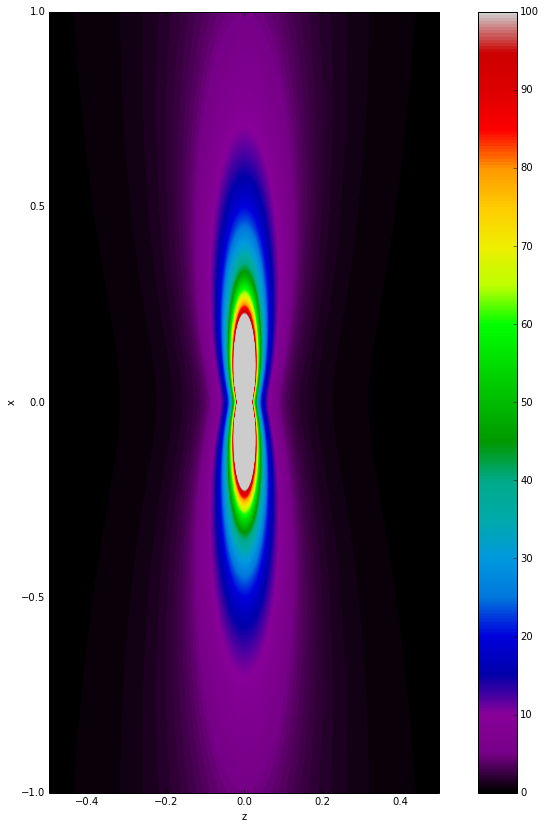

In [140]:
fig = figure(figsize=(14,14))

xlabel('z')
ylabel('x')

imshow(E, extent=[-0.5,0.5,-1,1], vmin=0, vmax=100, cmap = 'spectral')

colorbar()